In [27]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt

In [28]:
T = pd.read_csv('titanic.csv')
print(T.shape)
T.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
T.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
T.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [31]:
n = T[['Survived', 'Sex', 'Age', 'Fare']]

In [32]:
Xf = list(n)
Xf.remove('Survived')
Xf

['Sex', 'Age', 'Fare']

In [33]:
pclass = pd.get_dummies(T['Pclass'], drop_first=True)
pclass

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [34]:
en = pd.get_dummies(n[Xf], drop_first=True)

In [35]:
en = pd.concat([en,pclass], axis=1)
en

,Age,Fare,Sex_male,2,3
0,22.0,7.2500,1,0,1
1,38.0,71.2833,0,0,0
2,26.0,7.9250,0,0,1
3,35.0,53.1000,0,0,0
4,35.0,8.0500,1,0,1
...,...,...,...,...,...
886,27.0,13.0000,1,1,0
887,19.0,30.0000,0,0,0
888,NaN,23.4500,0,0,1
889,26.0,30.0000,1,0,0


In [44]:
en = en.fillna(en.mean())
en

,Age,Fare,Sex_male,2,3
0,22.000000,7.2500,1,0,1
1,38.000000,71.2833,0,0,0
2,26.000000,7.9250,0,0,1
3,35.000000,53.1000,0,0,0
4,35.000000,8.0500,1,0,1
...,...,...,...,...,...
886,27.000000,13.0000,1,1,0
887,19.000000,30.0000,0,0,0
888,29.699118,23.4500,0,0,1
889,26.000000,30.0000,1,0,0


In [45]:
en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Fare      891 non-null    float64
 2   Sex_male  891 non-null    uint8  
 3   2         891 non-null    uint8  
 4   3         891 non-null    uint8  
dtypes: float64(2), uint8(3)
memory usage: 16.7 KB


In [46]:
X = en
Y = T['Survived']    

In [47]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3, random_state=42)

In [48]:
model = DecisionTreeClassifier(criterion='entropy')

In [52]:
model.fit(Xtrain,Ytrain)

DecisionTreeClassifier(criterion='entropy')

In [53]:
predy = model.predict(Xtest)

In [54]:
print(metrics.roc_auc_score(Ytest, predy))
print(metrics.accuracy_score(Ytest, predy))

0.7754633614506227
0.7910447761194029


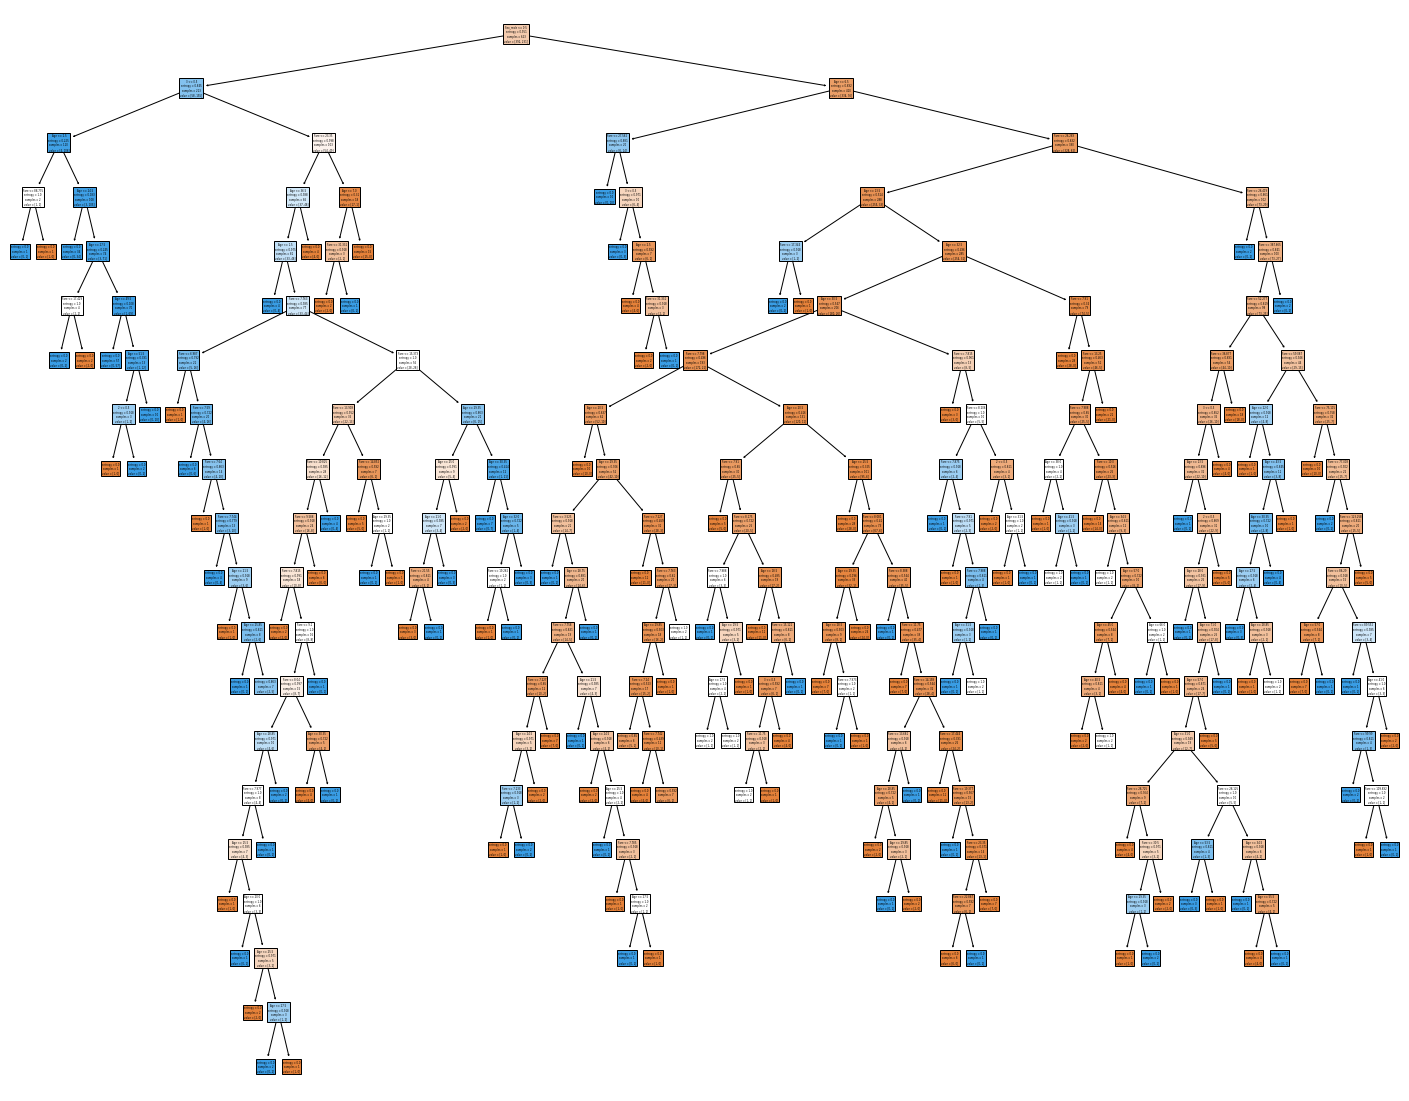

In [56]:
fig = plt.figure(figsize=(25,20))
_  = tree.plot_tree(model, feature_names=Xtrain.columns, filled = True)

In [57]:
from sklearn.model_selection import GridSearchCV
param = [{'criterion': ['gini', 'entropy'], 'max_depth': range(2,10)}]
model1 =DecisionTreeClassifier()
modelcv = GridSearchCV(model, param, cv=10, scoring = 'roc_auc')
modelcv.fit(Xtrain, Ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

In [58]:
modelcv.best_score_

0.8347951505016722

In [59]:
modelcv.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [60]:
predY = modelcv.predict(Xtest)

In [61]:
print(metrics.confusion_matrix(Ytest,predY))

[[150   7]
 [ 50  61]]


In [62]:
print(metrics.classification_report(Ytest,predY))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84       157
           1       0.90      0.55      0.68       111

    accuracy                           0.79       268
   macro avg       0.82      0.75      0.76       268
weighted avg       0.81      0.79      0.77       268



In [63]:
auc = metrics.roc_auc_score(Ytest, modelcv.predict_proba(Xtest)[:,1])
auc

0.8446089401503415

In [64]:
no_of_features = len(Xtrain.columns)

In [65]:
depth = int(np.log2(no_of_features))
depth

2

In [66]:
from sklearn.ensemble import RandomForestClassifier
modelrf = RandomForestClassifier(max_depth=depth, n_estimators = 100, random_state=101)
modelrf.fit(Xtrain, Ytrain)

RandomForestClassifier(max_depth=2, random_state=101)

In [67]:
auc1 = metrics.roc_auc_score(Ytest, modelrf.predict_proba(Xtest)[:,1])
auc1

0.8637459115166122

In [69]:
import seaborn as sns
feature_rank = pd.DataFrame({'feature':Xtrain.columns, 'importance': modelrf.feature_importances_})
feature_rank = feature_rank.sort_values('importance', ascending=False)

<AxesSubplot:xlabel='importance', ylabel='feature'>

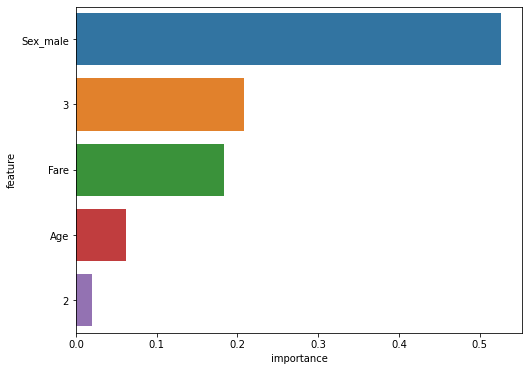

In [70]:
plt.figure(figsize=(8,6))
sns.barplot(y = 'feature', x = 'importance', data =feature_rank)